In [1]:
# lib
import sys
sys.path.append('..')

# set cwd one up
import os
os.chdir('..')

In [2]:
from torch import device, set_default_dtype, float64
from torch.cuda import is_available, get_device_name, memory_allocated, memory_reserved

# find gpu if available, and name
device = device("cuda" if is_available() else "cpu")
device = "cpu"
print(device)
set_default_dtype(float64)

# show device info
if is_available():
    print(get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(memory_reserved(0)/1024**3,1), 'GB')

cpu


Loaded data with 12 cells and 4 background noise models
Plots: on


Fitting background noise...
Background noise model:
Standard deviation: 11.553871266552218

Detrending and denoising cell data...


/Users/tristansones-dykes/scientific-computing/Python/MT5099/PyroCell/pyrocell/gp/__init__.py:166: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1724788636709/work/aten/src/ATen/native/TensorShape.cpp:3701.)
  term1 = -0.5 * matmul(residual.T, solve(K_with_noise, residual))


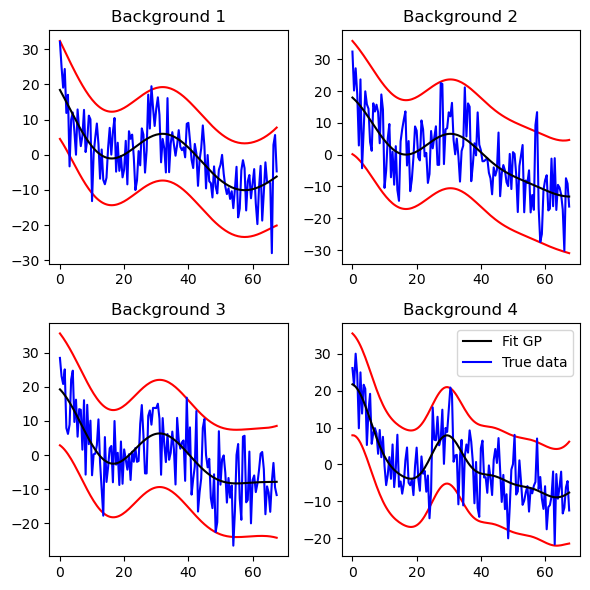

In [3]:
from pyrocell.core import OscillatorDetector

path = "data/hes/Hes1_example.csv"
osc = OscillatorDetector(path)

params = {
    "verbose": True,
    "plots": ["background"],
    "jitter": 1.0e-4,
}
osc.fit_models(**params)

In [4]:
for model in osc.bckgd_models:
    print(model.log_likelihood().item())

-513.0195297520959
-509.238634427111
-501.2166450134107
-473.87123462172485


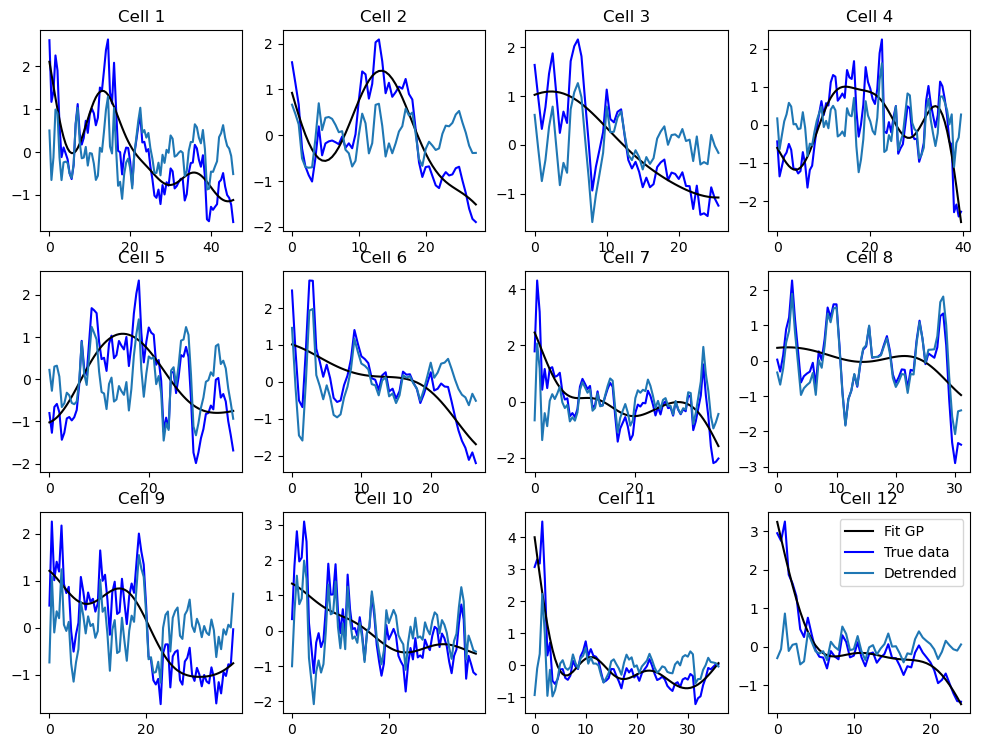

In [5]:
osc.plot("detrend")

In [6]:
print([(ouosc > ou).item() for ouosc, ou in zip(osc.OUosc_LL, osc.OU_LL)])

[True, False, True, False, True, True, True, True, False, True, False, False]


In [7]:
print(osc.OUosc_LL)
print(osc.OU_LL)

[tensor(-9.4518), tensor(-18.2329), tensor(4.3973), tensor(-23.3603), tensor(17.3891), tensor(-20.3581), tensor(-23.5019), tensor(-30.1691), tensor(-54.7325), tensor(-29.4734), tensor(-10.6632), tensor(-27.9489)]
[tensor(-19.5460), tensor(-1.7328), tensor(-15.4285), tensor(-21.0663), tensor(-35.6265), tensor(-28.7920), tensor(-31.5470), tensor(-50.4437), tensor(-26.2639), tensor(-47.3876), tensor(-4.6169), tensor(11.3609)]
